Code for Exploratory Data Analysis section of report

In [2]:
#Import required modules
import pandas as pd, xarray as xr, numpy as np, matplotlib.pyplot as plt, sklearn as sk, scipy

In [3]:
#Load in feature and label data
features = pd.read_csv('all_feature_data.csv')
labels = pd.read_csv('all_label_data.csv')
features = features.drop(columns = ['Unnamed: 0'])
labels = labels.drop(columns = ['Unnamed: 0'])

In [4]:
#Remove data points with more than half of features missing
dropidxs = []
for i in range(features.shape[0]):
  if pd.isnull(features).sum(axis = 1)[i] > 0.5*features.shape[1]:
    dropidxs.append(i)
print('Dropping ' + str(len(dropidxs)) + ' data points due to missing data')

features = features.drop(index = dropidxs).reset_index(drop=True)
labels = labels.drop(index = dropidxs).reset_index(drop=True)

Dropping 75 data points due to missing data


Text(0.5, 1.0, 'Scatterplot of 800mb HRRR wind speed forecast \n vs. actual wind speed')

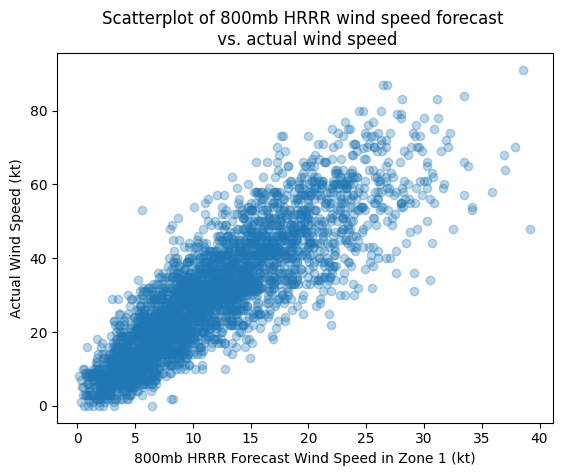

In [160]:
#Make scatterplot of ws8001 feature vs. observed wind speed
plt.scatter(features['ws8001'], labels['sknt'], alpha = 0.3)
plt.xlabel('800mb HRRR Forecast Wind Speed in Zone 1 (kt)')
plt.ylabel('Actual Wind Speed (kt)')
plt.title('Scatterplot of 800mb HRRR wind speed forecast \n vs. actual wind speed')

0.8594176423340971
0.8594176423340971


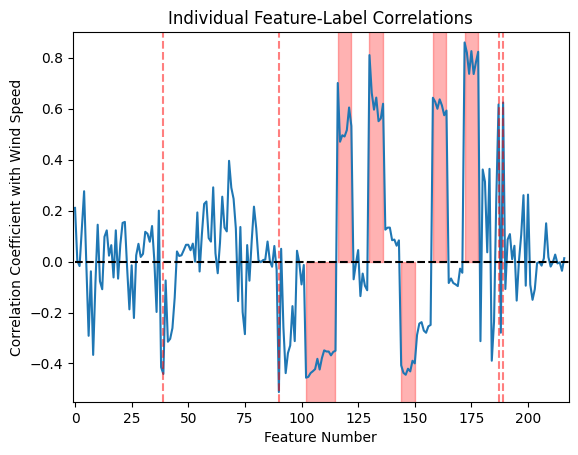

In [124]:
#Store all correlation coefficients between features and wind speed
all_ccs = []
for i in range(features.shape[1]):
  all_ccs.append(np.corrcoef(features.iloc[:, i], labels['sknt'])[0][1])

#Plot correlation coefficients
plt.plot(all_ccs)
print(max(all_ccs))
#Print correlation coefficient between ws8001 and wind speed
print(np.corrcoef(features['ws8001'], labels['sknt'])[0][1])
plt.xlabel('Feature Number')
plt.ylabel('Correlation Coefficient with Wind Speed')
plt.title('Individual Feature-Label Correlations')

#Set x and y limits of plot
plt.ylim([-0.55, 0.9])
plt.xlim([-1, 218])

#Plot lines and regions corresponding to features or groups of features
plt.plot([0, 218], [0, 0], '--k')
plt.plot([39, 39], [-0.55, 0.9], c = 'r', linestyle = '--', alpha = 0.5) #t80026
plt.plot([90, 90], [-0.55, 0.9], c = 'r', linestyle = '--', alpha = 0.5) #tsfc76
plt.fill_betweenx([-1, 0], 102, 115, color = 'r', alpha = 0.3) #tsfc/tdsfc
plt.fill_betweenx([0, 1], 116, 122, color = 'r', alpha = 0.3) #usfc
plt.fill_betweenx([0, 1], 130, 136, color = 'r', alpha = 0.3) #wssfc
plt.fill_betweenx([-1, 0], 144, 150, color = 'r', alpha = 0.3) #t800
plt.fill_betweenx([0, 1], 158, 164, color = 'r', alpha = 0.3) #u800
plt.fill_betweenx([0, 1], 172, 178, color = 'r', alpha = 0.3) #u800
plt.plot([187, 187], [-0.55, 0.9], c = 'r', linestyle = '--', alpha = 0.5)#ws5am
plt.plot([189, 189], [-0.55, 0.9], c = 'r', linestyle = '--', alpha = 0.5)#gust5am



0.5893101507579177
0.5835108392860437


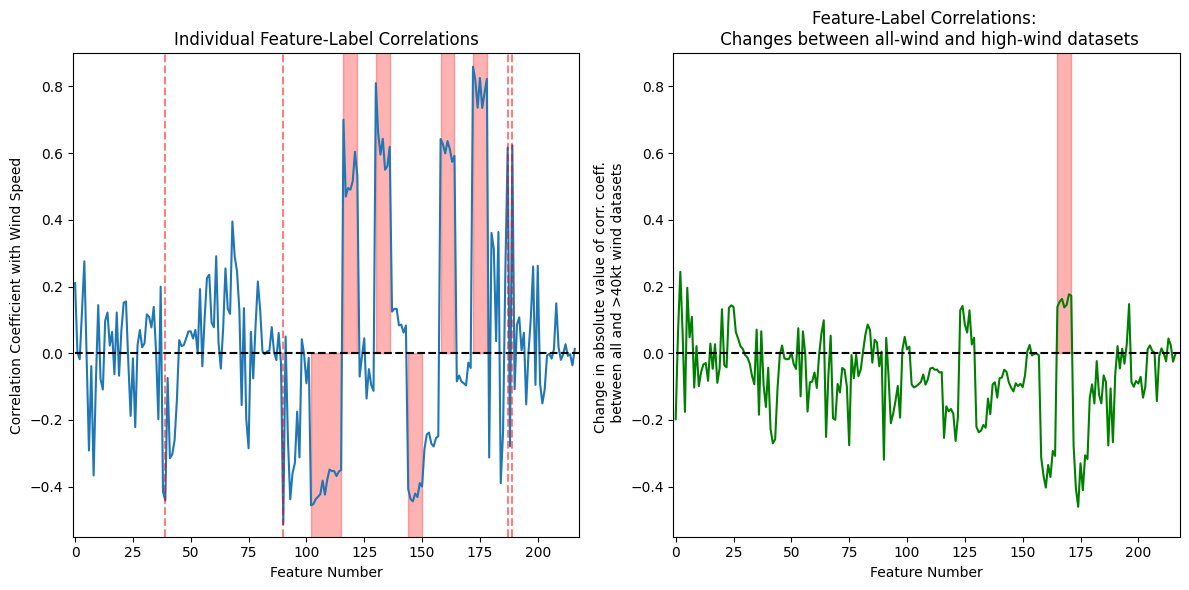

In [161]:
#Repeat above code, except also include change in corr. coef. when >40kt filtered wind dataset used
fig, ax = plt.subplots(1, 2, figsize = [12, 6])

#Get features and labels for dataset filtered to include only high winds
features_g40 = features[labels['sknt'] > 40]
labels_g40 = labels[labels['sknt'] > 40]

#Get correlation coefficients between featuers and labels for high wind data onlt
all_ccs_g40 = []
for i in range(features_g40.shape[1]):
  all_ccs_g40.append(np.corrcoef(features_g40.iloc[:, i], labels_g40['sknt'])[0][1])

#Plot correlation coefficients
ax[0].plot(all_ccs)
print(max(all_ccs_g40))
print(np.corrcoef(features_g40['ws8001'], labels_g40['sknt'])[0][1]) 
ax[0].set_xlabel('Feature Number')
ax[0].set_ylabel('Correlation Coefficient with Wind Speed')
ax[0].set_title('Individual Feature-Label Correlations')

ax[0].set_ylim([-0.55, 0.9])
ax[0].set_xlim([-1, 218])
ax[0].plot([0, 218], [0, 0], '--k')

#Plot lines and shaded regions indicating specific features / groups
ax[0].plot([39, 39], [-0.55, 0.9], c = 'r', linestyle = '--', alpha = 0.5) #t80026
ax[0].plot([90, 90], [-0.55, 0.9], c = 'r', linestyle = '--', alpha = 0.5) #tsfc76
ax[0].fill_betweenx([-1, 0], 102, 115, color = 'r', alpha = 0.3) #tsfc/tdsfc
ax[0].fill_betweenx([0, 1], 116, 122, color = 'r', alpha = 0.3) #usfc
ax[0].fill_betweenx([0, 1], 130, 136, color = 'r', alpha = 0.3) #wssfc
ax[0].fill_betweenx([-1, 0], 144, 150, color = 'r', alpha = 0.3) #t800
ax[0].fill_betweenx([0, 1], 158, 164, color = 'r', alpha = 0.3) #u800
ax[0].fill_betweenx([0, 1], 172, 178, color = 'r', alpha = 0.3) #u800
ax[0].plot([187, 187], [-0.55, 0.9], c = 'r', linestyle = '--', alpha = 0.5)#ws5am
ax[0].plot([189, 189], [-0.55, 0.9], c = 'r', linestyle = '--', alpha = 0.5)#gust5am

#Plot changes in correlation coefficients from all data to high wind data
ax[1].plot(abs(np.array(all_ccs_g40)) - abs(np.array(all_ccs)), 'g')
ax[1].set_ylim([-0.55, 0.9])
ax[1].set_xlim([-1, 218])
ax[1].plot([0, 218], [0, 0], '--k')
ax[1].set_xlabel('Feature Number')
ax[1].set_ylabel('Change in absolute value of corr. coeff. \n between all and >40kt wind datasets')
ax[1].set_title('Feature-Label Correlations: \n Changes between all-wind and high-wind datasets')

#Shade region of notable corr coef positive change
ax[1].fill_betweenx([0, 1], 165, 171, color = 'red', alpha = 0.3) #v800

plt.tight_layout()


(array([347., 573., 592., 667., 475., 293., 210.,  71.,  31.,   6.]),
 array([ 0. ,  9.1, 18.2, 27.3, 36.4, 45.5, 54.6, 63.7, 72.8, 81.9, 91. ]),
 <BarContainer object of 10 artists>)

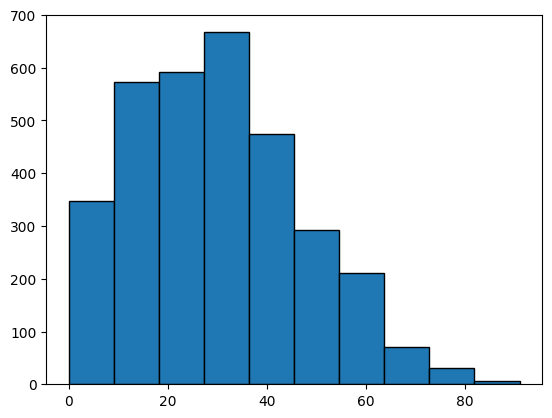

In [20]:
#Plot a histogram of wind speeds
plt.hist(labels['sknt'], edgecolor = 'k')